In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style('darkgrid')

from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

In [8]:
HOME = Path().resolve().parent.parent
data_dir = str(HOME) + '/data/processed/'

In [9]:
listings = pd.read_csv(data_dir + 'listings_transformed.csv.gz')
listings.shape

(456987, 24)

### How many listings are available during the year?

In [10]:
df = listings[['id', 'availability_60', 'year', 'month']].groupby(
    ['year', 'month'], as_index=False).agg({'id': 'count', 'availability_60': 'mean'})

In [11]:
df['date'] = df[['year', 'month']].apply(lambda x: datetime(x['year'], x['month'], 1), axis=1)

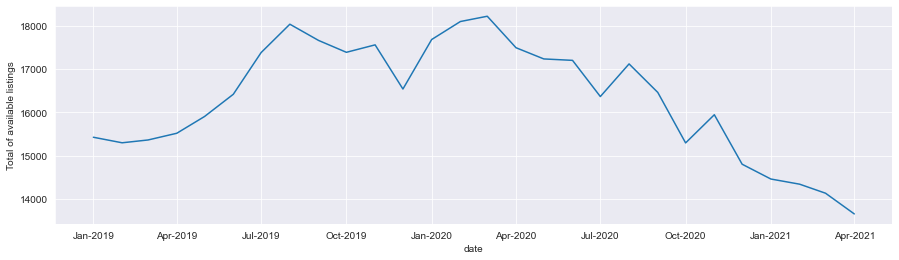

In [12]:
g, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(x='date', y='id', data=df, ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_ylabel('Total of available listings')
plt.show()

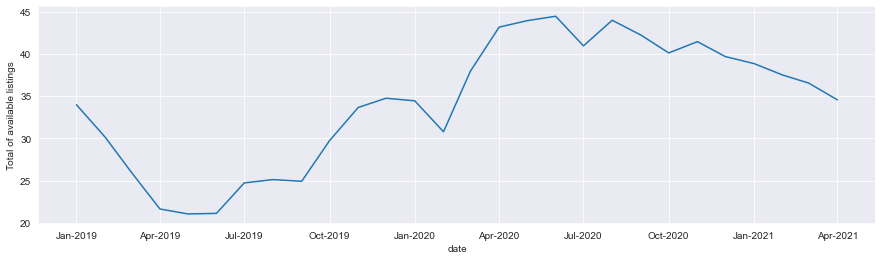

In [13]:
g, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(x='date', y='availability_60', data=df, ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_ylabel('Total of available listings')
plt.show()

In [14]:
df = listings[['id', 'availability_60', 'year', 'month']].groupby(
    ['id'], as_index=False).count()

In [15]:
df[df.month == 28]

id  availability_60  year  month
15        35379               28    28     28
17        35390               28    28     28
19        36763               28    28     28
22        46153               28    28     28
27        61444               28    28     28
...         ...              ...   ...    ...
19673  31549575               28    28     28
19677  31550583               28    28     28
19681  31551988               28    28     28
19684  31552495               28    28     28
19685  31553351               28    28     28

[2405 rows x 4 columns]

In [16]:
df.id

0           18666
1           18674
2           21605
3           21974
4           23197
           ...   
41726    49155035
41727    49155115
41728    49155172
41729    49155456
41730    49158347
Name: id, Length: 41731, dtype: int64

In [17]:
#pip install folium


In [18]:
listings_2104 = pd.read_csv(data_dir + 'listings_2104.csv.gz')
listings_2104.shape

(18226, 76)

In [19]:
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap, MarkerCluster

In [21]:
import numpy as np
import math

In [26]:
# Create the map
map_1 = folium.Map(location=[41.3879,2.16992], tiles='cartodbpositron', zoom_start=12)

# Add points to the map
mc = MarkerCluster()
for idx, row in listings_2104.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(folium.Marker([row['latitude'], row['longitude']]))
map_1.add_child(mc)

# Display the map
display(map_1)

In [44]:
#conda install geopandas


In [45]:
import pandas as pd
import geopandas as gpd 

AttributeError: 'LGEOS360' object has no attribute 'GEOSBufferWithParams'

In [42]:
# Shapfile with the different neigborhoods of Barceelona
suburbs_map = gpd.read_file("0301040100_Barris_UNITATS_ADM.shp")
suburbs_map = suburbs_map[["NAME", "geometry"]].set_index("NAME")

# List of neighborhoods available in the database
barris_list = [name.upper() for name in listings_2104["neighbourhood_group_cleansed"].unique()]
s = barris_map.loc[barris_list] 
s = s[~s.index.duplicated(keep='first')]

# Neighborhood data
barris_data = listings_2104.groupby("neighbourhood_group_cleansed").availability_60.mean()
name = [name.upper() for name in barris_data.index]
sdf = pd.DataFrame({"NAME":name, "VALUE":listins_2104.groupby("neighbourhood_group_cleansed").availability_60.mean()})
sdf = sdf.set_index("NAME")

# Create a base map
m_2 = folium.Map(location=[41.3879,2.16992], tiles='cartodbpositron', zoom_start=12)

# Add a choropleth map to the base map
folium.Choropleth(geo_data=s.__geo_interface__, 
           data=sdf.VALUE, 
           key_on="feature.id", 
           fill_color='YlGnBu', 
           legend_name='Number of listings (log)'
          ).add_to(m_6)

# Display the map
m_2

NameError: name 'gpd' is not defined